# Lagrangian Dynamics

Author: Michael Greer

This notebook serves as an introduction to lagrangian dynamics

In [31]:
import numpy as np
from numpy import pi, sin, cos

import matplotlib.pyplot as plt

import sympy as sp

In [32]:
# Define necessary variables
t = sp.Symbol('t')
g = sp.Symbol('g')

q1 = sp.Function('q1')(t)
q2 = sp.Function('q2')(t)

q1_dot = sp.diff(q1, t)
q2_dot = sp.diff(q2, t)

In [33]:
# Properties

mc = 2 # Mass of cart
mp = 2 # Mass of pendulum
l = 2 # Length of pendulum

# Inertia
I = (1/12) * mp * l**2

# Linear velocities of the center of mass of the pendulum
x_dot = q1_dot - (l/2)*sp.cos(q2)*q2_dot
y_dot = -1*(l/2)*sp.sin(q2)*q2_dot

# Kinetic Energy
# The kinetic energy is the sum of the angular and linear kinetic energy of the pendulum

K = (1/2)*mc*q1_dot**2 + (1/2)*mp*(x_dot**2 + y_dot**2) + (1/2)*I*q2_dot**2

P = mp * l * sp.cos(q2) * g

L = K - P

In [34]:
tau_1 = sp.diff(sp.diff(L, q1_dot), t) - sp.diff(L, q1)
tau_2 = sp.diff(sp.diff(L, q2_dot), t) - sp.diff(L, q2)

tau_1 = sp.simplify(tau_1)
tau_2 = sp.simplify(tau_2)

print(tau_1)
print(tau_2)

2.0*sin(q2(t))*Derivative(q2(t), t)**2 - 2.0*cos(q2(t))*Derivative(q2(t), (t, 2)) + 4.0*Derivative(q1(t), (t, 2))
-4.0*g*sin(q2(t)) - 2.0*cos(q2(t))*Derivative(q1(t), (t, 2)) + 2.66666666666667*Derivative(q2(t), (t, 2))


$$\tau_{1}=2sin(q_{2})\dot{q_{2}}^{2}-2cos(q_{2})\ddot{q_{2}}+4\ddot{q_{1}}$$
$$\tau_{2}=-4gsin(q2)-2cos(q_{2})\ddot{q_{1}}+2.66667\ddot{q_{2}}$$

If we group this result into matrix form, we get a much cleaner:

$$\tau=D(q)\ddot{q}+C(q,\dot{q})\dot{q}+g(q)$$

With:

$$D=\begin{bmatrix}4 & -2cos(q_{2}) \\ -2cos(q_{2}) & 2.66667 \end{bmatrix}$$

$$C=\begin{bmatrix}0 & 2sin(q_{2}) \\ 0 & 0 \end{bmatrix}$$

$$g=\begin{bmatrix}0 \\ -4gsin(q_{2}) \end{bmatrix}$$

This is the standard form in which we consider the dynamics of robotic systems. Due to Newton's third law, the D matrix will always be symmetric. This is a good way to quickly check your work.

In order to simulate this system, we need to isolate the $\ddot{q}$ terms. In matrix form, this is an easy task:

$$\ddot{q}=D(q)^{-1}(\tau - C(q,\dot{q})\dot{q} - g(q))$$

In [35]:
def D(q):
    
    q1 = q[0]
    q2 = q[1]
    
    D11 = 4.0
    D12 = (-2 * cos(q2))[0]
    D21 = (-2 * cos(q2))[0]
    D22 = 2.66667
    
    D_mat = np.array([[D11, D12],
                      [D21, D22]])
    
    return D_mat

def C(q, q_dot):
    
    q1 = q[0]
    q2 = q[1]
    
    q1_dot = q_dot[0]
    q2_dot = q_dot[1]
    
    C11 = 0.0
    C12 = (2 * sin(q2)*q2_dot)[0]
    C21 = 0.0
    C22 = 0.0
    
    C_mat = np.array([[C11, C12],
                      [C21, C22]])

    return C_mat

def g(q):
    
    q1 = q[0]
    q2 = q[1]
    
    g1 = 0.0
    g2 = (-4 * 9.8 * sin(q2))[0]
    
    g_mat = np.array([[g1],
                      [g2]])
    
    return g_mat

In [36]:
def dydt(y, t):
    
    q = y[0:2]
    q_dot = y[2:4]
    
    tau = np.array([[0],[0]])
    
    q_ddot = (np.linalg.inv(D(q))) @ (tau - C(q, q_dot)@q_dot - g(q))
    
    y_dot = np.zeros((4,1))
    
    y_dot[0:2] = q_dot
    y_dot[2:4] = q_ddot
    
    #print(q_ddot)
    
    #print()
    
    return y_dot

In [37]:
def plot_states(y):
    
    fig,a =  plt.subplots(2,2,figsize = (12,12))

    a[0][0].plot(y_trace[:,0])
    a[0][0].set_title('Position 1')
    
    a[0][1].plot(y_trace[:,1])
    a[0][1].set_title('Position 2')
    
    a[1][0].plot(y_trace[:,2])
    a[1][0].set_title('Velocity 1')
    
    a[1][1].plot(y_trace[:,3])
    a[1][1].set_title('Velocity 2')

    plt.show()

In [54]:
from runge_kutta_step import *

# Initial conditions
y = np.array([[0] , [0.1] , [0] , [0]])

t = 0

h = 0.005

simtime = 10

y_trace = []

for i in range(int(simtime/h)):
    
    (y, t) = runge_kutta_step(dydt, y, t, h)
    
    if ((h*i) % (simtime/10) == 0):
        print("time: {}".format(h * i))
    
    y_trace.append(y)

y_trace = np.array(y_trace).reshape((-1,4))

print(y_trace.shape)

time: 0.0
time: 1.0
time: 2.0
time: 3.0
time: 4.0
time: 5.0
time: 6.0
time: 7.0
time: 8.0
time: 9.0
(2000, 4)


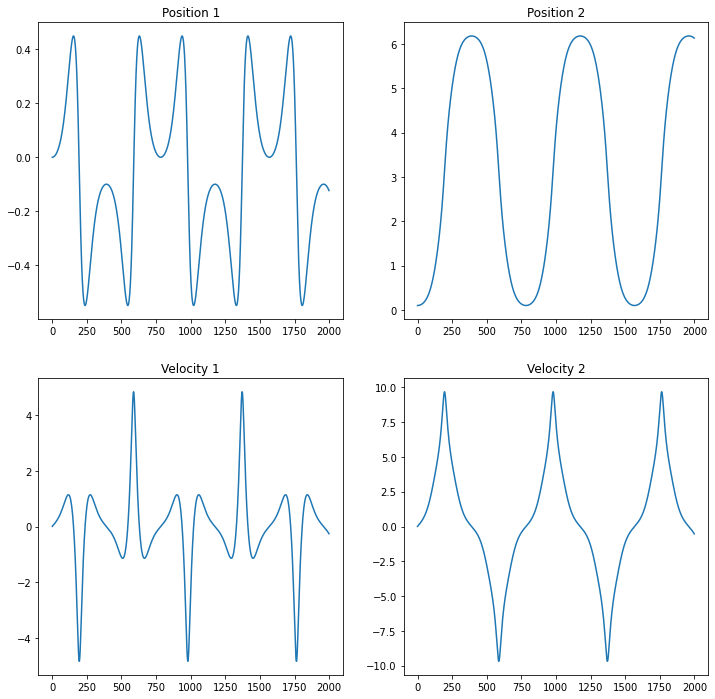

In [55]:
plot_states(y_trace)